In [ ]:
!pip install torchviz

# Simple Neural Network

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2024)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

encoded_y_train = encoder.fit_transform(y_train.reshape(-1, 1))
encoded_y_test = encoder.fit_transform(y_test.reshape(-1, 1))

In [ ]:
print(scaled_X_train[:5])
print(scaled_X_test[:5])

[[ 1.58567672 -0.13294368  1.14826223  0.52160241]
 [-0.89735367  1.81980278 -1.08785432 -1.07165586]
 [-0.06967687 -0.8652236   0.17354476 -0.27502673]
 [ 0.28504175 -1.1093169   1.03358959  0.25605936]
 [-1.13383276  0.11114963 -1.31719961 -1.46997043]]
[[-0.06967687  2.30798939 -1.48920858 -1.33719891]
 [-1.13383276  1.33161616 -1.37453593 -1.46997043]
 [ 0.16680221 -0.37703698  0.40289005  0.38883089]
 [ 0.16680221 -0.13294368  0.57489901  0.78714546]
 [-0.89735367  1.81980278 -1.25986329 -1.33719891]]


In [ ]:
print(encoded_y_train[:5])
print(encoded_y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


## Convert to Tensors

In [ ]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
X_train = torch.tensor(scaled_X_train, dtype=torch.float32)
y_train = torch.tensor(encoded_y_train, dtype=torch.float32)

In [ ]:
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, 32, shuffle=True)

## Building Model

In [ ]:
# Define a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [ ]:
def train_batch(model, criterion, optimizer, train_dl, num_epochs=5):
    loss_vals = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x_batch, y_batch in train_dl:
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()

            # update parameters
            optimizer.step()
            epoch_loss += loss.item()

        epoch_loss /= len(train_dl)

        # End of a batch
        loss_vals.append(epoch_loss)
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    return loss_vals


def predict(model, x):
    with torch.inference_mode():
        predicted = model(x)
        return predicted

# Initialize model

In [ ]:
model = SimpleNN(scaled_X_train.shape[1], 16, 3)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


# Vanila gradient descent
for epoch in range(20):
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)

    # Differentiation
    loss.backward()

    # Update parameters
    optimizer.step()
    print(f"Epoch: {epoch + 1}, Loss: {loss.item(): .4f}")

Epoch: 1, Loss:  1.1162
Epoch: 2, Loss:  1.1155
Epoch: 3, Loss:  1.1148
Epoch: 4, Loss:  1.1141
Epoch: 5, Loss:  1.1134
Epoch: 6, Loss:  1.1127
Epoch: 7, Loss:  1.1120
Epoch: 8, Loss:  1.1113
Epoch: 9, Loss:  1.1106
Epoch: 10, Loss:  1.1100
Epoch: 11, Loss:  1.1093
Epoch: 12, Loss:  1.1086
Epoch: 13, Loss:  1.1079
Epoch: 14, Loss:  1.1072
Epoch: 15, Loss:  1.1065
Epoch: 16, Loss:  1.1058
Epoch: 17, Loss:  1.1051
Epoch: 18, Loss:  1.1044
Epoch: 19, Loss:  1.1037
Epoch: 20, Loss:  1.1030


### Computational Graph

In [ ]:
from torchviz import make_dot

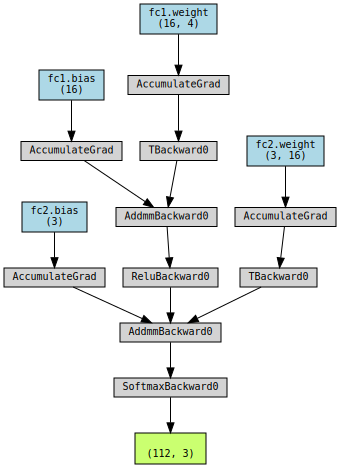

In [ ]:
make_dot(output, params=dict(model.named_parameters()))

In [ ]:
losses = train_batch(model, criterion, optimizer, train_dl, num_epochs=20)

Epoch: 1/20, Loss: 1.0999
Epoch: 2/20, Loss: 1.0971
Epoch: 3/20, Loss: 1.0966
Epoch: 4/20, Loss: 1.0923
Epoch: 5/20, Loss: 1.0896
Epoch: 6/20, Loss: 1.0878
Epoch: 7/20, Loss: 1.0867
Epoch: 8/20, Loss: 1.0804
Epoch: 9/20, Loss: 1.0793
Epoch: 10/20, Loss: 1.0760
Epoch: 11/20, Loss: 1.0730
Epoch: 12/20, Loss: 1.0700
Epoch: 13/20, Loss: 1.0684
Epoch: 14/20, Loss: 1.0665
Epoch: 15/20, Loss: 1.0635
Epoch: 16/20, Loss: 1.0579
Epoch: 17/20, Loss: 1.0571
Epoch: 18/20, Loss: 1.0529
Epoch: 19/20, Loss: 1.0493
Epoch: 20/20, Loss: 1.0513


## Predict

In [ ]:
y_pred = predict(model, torch.tensor(scaled_X_test, dtype=torch.float32))

In [ ]:
y_pred[:5]

tensor([[0.4917, 0.2525, 0.2559],
        [0.5017, 0.2484, 0.2499],
        [0.3497, 0.3149, 0.3354],
        [0.3334, 0.3202, 0.3464],
        [0.4959, 0.2527, 0.2515]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        14
           1       0.00      0.00      0.00        11
           2       1.00      0.92      0.96        13

    accuracy                           0.68        38
   macro avg       0.51      0.64      0.55        38
weighted avg       0.54      0.68      0.59        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Experience with difference optimizers

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

In [ ]:
optimizer_loss_vals = []
optimizers = {'Adam': torch.optim.Adam, 'Adagrad': torch.optim.Adagrad, 'RMSprop': torch.optim.RMSprop}
new_criterion = torch.nn.CrossEntropyLoss()
trained_models = []

for name, optim in optimizers.items():
    print(f'Optimizer: {name}')
    model = SimpleNN(scaled_X_train.shape[1], 16, 3)
    optimizer = optim(model.parameters(), lr=0.01)
    new_criterion = torch.nn.CrossEntropyLoss()
    optimizer_loss_vals.append(train_batch(model, new_criterion, optimizer, train_dl, num_epochs=70))
    trained_models.append(model)

Optimizer: Adam
Epoch: 1/70, Loss: 1.1079
Epoch: 2/70, Loss: 1.0427
Epoch: 3/70, Loss: 0.9769
Epoch: 4/70, Loss: 0.9173
Epoch: 5/70, Loss: 0.8407
Epoch: 6/70, Loss: 0.7960
Epoch: 7/70, Loss: 0.7608
Epoch: 8/70, Loss: 0.7445
Epoch: 9/70, Loss: 0.7472
Epoch: 10/70, Loss: 0.7232
Epoch: 11/70, Loss: 0.7046
Epoch: 12/70, Loss: 0.6992
Epoch: 13/70, Loss: 0.6953
Epoch: 14/70, Loss: 0.6790
Epoch: 15/70, Loss: 0.6669
Epoch: 16/70, Loss: 0.6627
Epoch: 17/70, Loss: 0.6440
Epoch: 18/70, Loss: 0.6376
Epoch: 19/70, Loss: 0.6267
Epoch: 20/70, Loss: 0.6188
Epoch: 21/70, Loss: 0.6149
Epoch: 22/70, Loss: 0.6088
Epoch: 23/70, Loss: 0.6018
Epoch: 24/70, Loss: 0.5961
Epoch: 25/70, Loss: 0.5954
Epoch: 26/70, Loss: 0.5890
Epoch: 27/70, Loss: 0.5845
Epoch: 28/70, Loss: 0.5837
Epoch: 29/70, Loss: 0.5817
Epoch: 30/70, Loss: 0.5804
Epoch: 31/70, Loss: 0.5829
Epoch: 32/70, Loss: 0.5814
Epoch: 33/70, Loss: 0.5814
Epoch: 34/70, Loss: 0.5850
Epoch: 35/70, Loss: 0.5747
Epoch: 36/70, Loss: 0.5758
Epoch: 37/70, Loss: 0

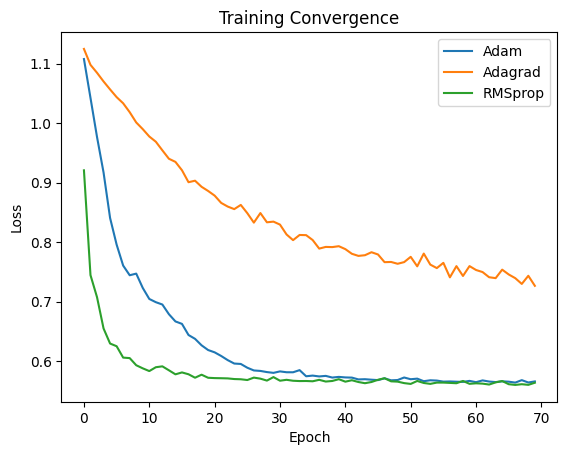

In [ ]:
for i, name in enumerate(optimizers.keys()):
    plt.plot(optimizer_loss_vals[i], label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Convergence')
plt.legend()
plt.show()

In [ ]:
names = ['Adam', 'Adagrad', 'RMSprop']
accuracy_scores = {}
for model, name in zip(trained_models, names):
  y_pred = predict(model, torch.tensor(scaled_X_test, dtype=torch.float32))
  accuracy_scores[name] = accuracy_score(encoded_y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(accuracy_scores)

{'Adam': 0.9210526315789473, 'Adagrad': 0.8421052631578947, 'RMSprop': 0.9210526315789473}


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.007, round(y[i], 2), ha = 'center')

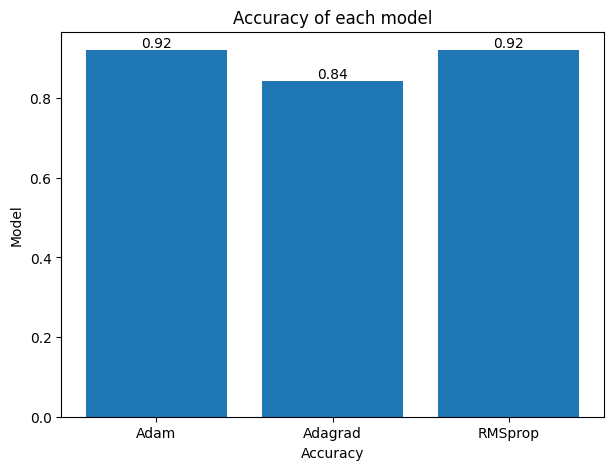

In [ ]:
fig = plt.figure(figsize=(7, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), width=0.8)
addlabels(list(accuracy_scores.keys()), list(accuracy_scores.values()))

plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Accuracy of each model")
plt.show()

## Investigate the impact of batch size, learning rate, and network architecture on gradient computation and training dynamics

In [ ]:
def plot_converge(tester, losses, main_label):
  for i, label in enumerate(tester):
    plt.plot(losses[i], label=f"{main_label}: {label}")

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training Convergence')
  plt.legend()
  plt.show()

### Batch size

In [ ]:
batch_sizes = [16, 32, 64]
batch_losses = []
for batch_size in batch_sizes:
    train_dl = DataLoader(train_ds, batch_size, shuffle=True)

    model = SimpleNN(scaled_X_train.shape[1], 16, 3)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    losses = train_batch(model, criterion, optimizer, train_dl, num_epochs=100)

    batch_losses.append(losses)
    print(f"Batch Size: {batch_size}, Loss: {losses}")

Epoch: 1/100, Loss: 1.1027
Epoch: 2/100, Loss: 1.0998
Epoch: 3/100, Loss: 1.0969
Epoch: 4/100, Loss: 1.0940
Epoch: 5/100, Loss: 1.0911
Epoch: 6/100, Loss: 1.0881
Epoch: 7/100, Loss: 1.0852
Epoch: 8/100, Loss: 1.0822
Epoch: 9/100, Loss: 1.0792
Epoch: 10/100, Loss: 1.0762
Epoch: 11/100, Loss: 1.0732
Epoch: 12/100, Loss: 1.0701
Epoch: 13/100, Loss: 1.0671
Epoch: 14/100, Loss: 1.0641
Epoch: 15/100, Loss: 1.0610
Epoch: 16/100, Loss: 1.0579
Epoch: 17/100, Loss: 1.0548
Epoch: 18/100, Loss: 1.0517
Epoch: 19/100, Loss: 1.0485
Epoch: 20/100, Loss: 1.0454
Epoch: 21/100, Loss: 1.0421
Epoch: 22/100, Loss: 1.0388
Epoch: 23/100, Loss: 1.0355
Epoch: 24/100, Loss: 1.0322
Epoch: 25/100, Loss: 1.0289
Epoch: 26/100, Loss: 1.0255
Epoch: 27/100, Loss: 1.0221
Epoch: 28/100, Loss: 1.0186
Epoch: 29/100, Loss: 1.0151
Epoch: 30/100, Loss: 1.0116
Epoch: 31/100, Loss: 1.0080
Epoch: 32/100, Loss: 1.0044
Epoch: 33/100, Loss: 1.0008
Epoch: 34/100, Loss: 0.9971
Epoch: 35/100, Loss: 0.9934
Epoch: 36/100, Loss: 0.9897
E

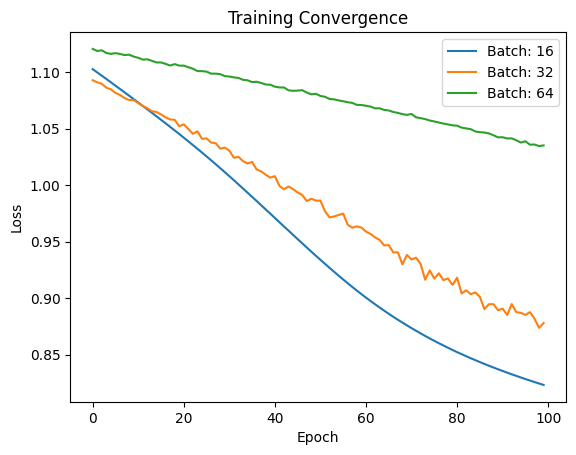

In [ ]:
plot_converge(batch_sizes, batch_losses, "Batch")

### Learning rate

In [ ]:
learning_rates = [0.1, 0.05, 0.0025]
lr_losses = []
for lr in learning_rates:
    train_dl = DataLoader(train_ds, 32, shuffle=True)

    model = SimpleNN(scaled_X_train.shape[1], 16, 3)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    losses = train_batch(model, criterion, optimizer, train_dl, num_epochs=100)

    lr_losses.append(losses)
    print(f"Learning Rate: {lr}, Loss: {losses}")

Epoch: 1/100, Loss: 1.1014
Epoch: 2/100, Loss: 1.0839
Epoch: 3/100, Loss: 1.0674
Epoch: 4/100, Loss: 1.0528
Epoch: 5/100, Loss: 1.0373
Epoch: 6/100, Loss: 1.0090
Epoch: 7/100, Loss: 0.9996
Epoch: 8/100, Loss: 0.9760
Epoch: 9/100, Loss: 0.9571
Epoch: 10/100, Loss: 0.9484
Epoch: 11/100, Loss: 0.9254
Epoch: 12/100, Loss: 0.9129
Epoch: 13/100, Loss: 0.8941
Epoch: 14/100, Loss: 0.8835
Epoch: 15/100, Loss: 0.8770
Epoch: 16/100, Loss: 0.8636
Epoch: 17/100, Loss: 0.8549
Epoch: 18/100, Loss: 0.8508
Epoch: 19/100, Loss: 0.8533
Epoch: 20/100, Loss: 0.8398
Epoch: 21/100, Loss: 0.8228
Epoch: 22/100, Loss: 0.8335
Epoch: 23/100, Loss: 0.8196
Epoch: 24/100, Loss: 0.8192
Epoch: 25/100, Loss: 0.8104
Epoch: 26/100, Loss: 0.8144
Epoch: 27/100, Loss: 0.8041
Epoch: 28/100, Loss: 0.7961
Epoch: 29/100, Loss: 0.7931
Epoch: 30/100, Loss: 0.7886
Epoch: 31/100, Loss: 0.7849
Epoch: 32/100, Loss: 0.7950
Epoch: 33/100, Loss: 0.7877
Epoch: 34/100, Loss: 0.7969
Epoch: 35/100, Loss: 0.7780
Epoch: 36/100, Loss: 0.7685
E

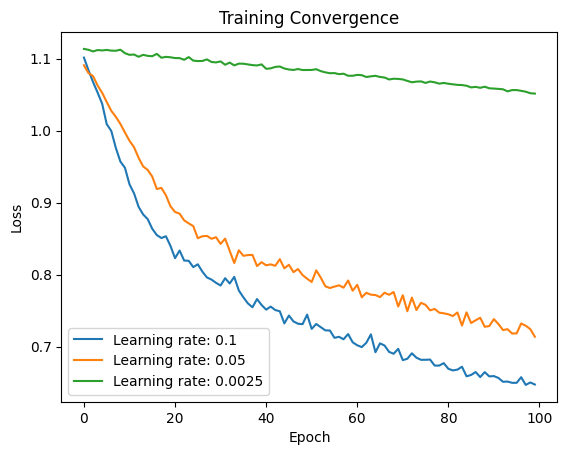

In [ ]:
plot_converge(learning_rates, lr_losses, "Learning rate")

### Hidden layers

In [ ]:
hidden_units = [64, 128, 256]
arch_losses = []
for units in hidden_units:
    train_dl = DataLoader(train_ds, 32, shuffle=True)

    model =  SimpleNN(scaled_X_train.shape[1], units, 3)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    losses = train_batch(model, criterion, optimizer, train_dl, num_epochs=100)

    arch_losses.append(losses)
    print(f"Hidden Units: {units}, Loss: {losses}")

Epoch: 1/100, Loss: 1.0472
Epoch: 2/100, Loss: 1.0369
Epoch: 3/100, Loss: 1.0349
Epoch: 4/100, Loss: 1.0225
Epoch: 5/100, Loss: 1.0185
Epoch: 6/100, Loss: 1.0124
Epoch: 7/100, Loss: 0.9984
Epoch: 8/100, Loss: 0.9968
Epoch: 9/100, Loss: 0.9901
Epoch: 10/100, Loss: 0.9857
Epoch: 11/100, Loss: 0.9691
Epoch: 12/100, Loss: 0.9752
Epoch: 13/100, Loss: 0.9642
Epoch: 14/100, Loss: 0.9626
Epoch: 15/100, Loss: 0.9581
Epoch: 16/100, Loss: 0.9447
Epoch: 17/100, Loss: 0.9405
Epoch: 18/100, Loss: 0.9416
Epoch: 19/100, Loss: 0.9388
Epoch: 20/100, Loss: 0.9293
Epoch: 21/100, Loss: 0.9251
Epoch: 22/100, Loss: 0.9272
Epoch: 23/100, Loss: 0.9236
Epoch: 24/100, Loss: 0.9195
Epoch: 25/100, Loss: 0.9102
Epoch: 26/100, Loss: 0.9118
Epoch: 27/100, Loss: 0.9079
Epoch: 28/100, Loss: 0.8976
Epoch: 29/100, Loss: 0.8940
Epoch: 30/100, Loss: 0.8891
Epoch: 31/100, Loss: 0.8900
Epoch: 32/100, Loss: 0.8905
Epoch: 33/100, Loss: 0.8977
Epoch: 34/100, Loss: 0.8886
Epoch: 35/100, Loss: 0.8857
Epoch: 36/100, Loss: 0.8853
E

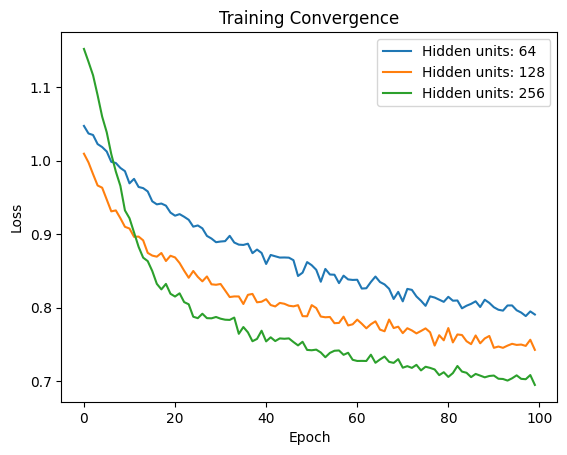

In [ ]:
plot_converge(hidden_units, arch_losses, "Hidden units")

# Analyze the efficiency and numerical stability of Autograd-based gradient computations.

In [ ]:
import torch
from torch.autograd import Variable
import time

In [ ]:
# Define a simple function
def func(x):
    return torch.exp(x) / (torch.exp(x) + 1)

In [ ]:
# Finite difference gradient computation
def finite_diff_grad(x):
    epsilon = 1e-6
    grad = (func(x + epsilon) - func(x)) / epsilon
    return grad

In [ ]:
# Autograd gradient computation
def autograd_grad(x):
    x = Variable(x, requires_grad=True)
    y = func(x)
    y.backward(torch.ones_like(x))  # Specify gradients explicitly for multidimensional input
    return x.grad

In [ ]:
# Generate random input data
x = torch.randn(5, requires_grad=True)

In [ ]:
# Compute gradients using finitite differentiation
start_time = time.time()
finite_diff_gradient = finite_diff_grad(x)
finite_diff_time = time.time() - start_time

In [ ]:
# Compute gradients using autograd
start_time = time.time()
autograd_gradient = autograd_grad(x)
autograd_time = time.time() - start_time

In [ ]:
# Compare gradients
print("Finite Difference Gradient:", finite_diff_gradient)
print("Autograd Gradient:", autograd_gradient)

# Compare time
print("Finite Difference Time:", finite_diff_time)
print("Autograd Time:", autograd_time)

Finite Difference Gradient: tensor([0.1341, 0.2384, 0.2384, 0.2086, 0.2682], grad_fn=<DivBackward0>)
Autograd Gradient: tensor([0.1335, 0.2231, 0.2295, 0.2415, 0.2500])
Finite Difference Time: 0.017809152603149414
Autograd Time: 0.003920555114746094


In [ ]:
x_perturbed = x + 1e-3 * torch.randn_like(x)

# Compute gradients using both methods with perturbed data
finite_diff_gradient_perturbed = finite_diff_grad(x_perturbed)
autograd_gradient_perturbed = autograd_grad(x_perturbed)

# Measure stability using Mean Absolute Error (MAE)
finite_diff_stability = torch.mean(torch.abs(finite_diff_gradient - finite_diff_gradient_perturbed))
autograd_stability = torch.mean(torch.abs(autograd_gradient - autograd_gradient_perturbed))

In [ ]:
print("Finite Difference Gradient Stability (MAE):", finite_diff_stability.item())
print("Autograd Gradient Stability (MAE):", autograd_stability.item())

Finite Difference Gradient Stability (MAE): 0.014901161193847656
Autograd Gradient Stability (MAE): 4.3922664190176874e-05


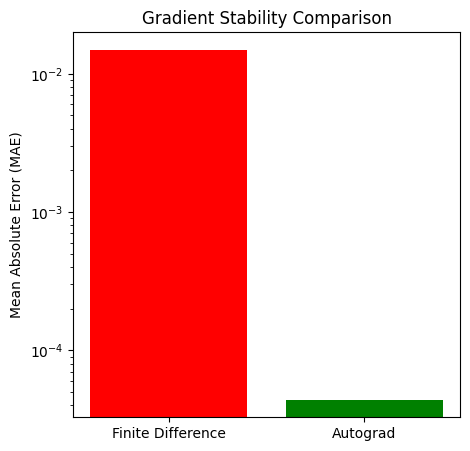

In [ ]:
labels = ['Finite Difference', 'Autograd']
stability_values = [finite_diff_stability.item(), autograd_stability.item()]

fig = plt.figure(figsize=(5, 5))

plt.bar(labels, stability_values, color=['red', 'green'])
plt.yscale('log')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Gradient Stability Comparison')
plt.show()